In [40]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [41]:
plt.rcParams["figure.figsize"] = (6,6)

In [42]:
import numpy as np
import torch
from sklearn import datasets

# Simple gradients on tensors

In [43]:
a = torch.ones((3,2), requires_grad=True)
b = torch.ones((3,2), requires_grad=True)

In [88]:
torch.tensor(3)

tensor(3)

In [91]:
x0=torch.tensor(3.1,requires_grad=True)
def sigmoid(a):
    """Sigmoid activation function."""

    return 1/(1 + (-a).exp())
c=sigmoid(x0)
c.backward()
x0.grad.item()

0.041249021887779236

In [45]:
b

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

In [46]:
c = (5 * a + 2 * b).sum()

In [47]:
c

tensor(42., grad_fn=<SumBackward0>)

In [48]:
a.grad

In [49]:
b.grad

The function is this:

$$
c = \sum_{ij} 5a_{ij}
$$

The gradient:

$$
    \frac{\partial c}{\partial a_{ij}} = \frac{\partial}{\partial a_{ij}}\sum_{km} 5a_{km} = 5 \sum_{km} \delta_{ik}\delta_{mj}  = 5
$$

In [50]:
d = (3 * a)

In [53]:
c.backward()

In [54]:
a.grad

tensor([[5., 5.],
        [5., 5.],
        [5., 5.]])

In [55]:
print(c)

tensor(42., grad_fn=<SumBackward0>)


In [56]:
a.grad is None

False

In [16]:
c.backward()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [14]:
a.grad

tensor([[5., 5.],
        [5., 5.],
        [5., 5.]])

In [ ]:
x0=3


In [57]:
a.grad.zero_()
b.grad.zero_()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

# Logistic regression example

In [29]:
X, y = datasets.make_blobs(1000, centers=[[-3, -3], [0, 0]], cluster_std=1.25)

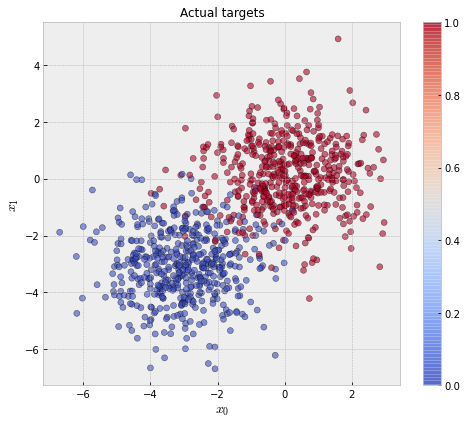

In [30]:
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [31]:
Xt = torch.tensor(X, dtype=torch.float)
yt = torch.tensor(np.expand_dims(y, axis=-1), dtype=torch.float)

Sigmoid activation function is defined as:
    
$$
\sigma (x) = \frac{1}{1+e^{-x}}
$$

Text(0.5, 1.0, 'Sigmoid function')

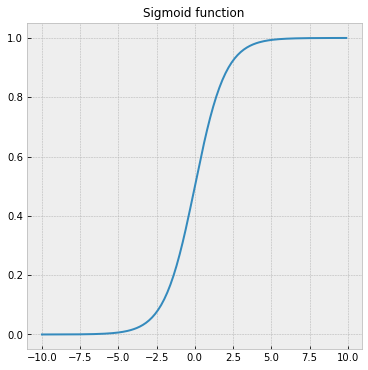

In [32]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, 1/(1+np.exp(-x)))
plt.title("Sigmoid function", fontsize=12)

In [58]:
def sigmoid(a):
    """Sigmoid activation function."""

    return 1/(1 + (-a).exp())

In [59]:
X

array([[-3.17295757, -2.28017149],
       [ 1.96707956, -1.86915215],
       [-0.09205149,  1.69491901],
       ...,
       [-1.39666885, -0.13521373],
       [-2.0793234 , -2.55782365],
       [-0.54204559,  2.05712497]])

In [60]:
y

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [61]:
W = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

In [62]:
W, b

(tensor([[1.4522],
         [0.7818]], requires_grad=True),
 tensor([[1.0486e-05]], requires_grad=True))

## Meaning of $W$ and $b$

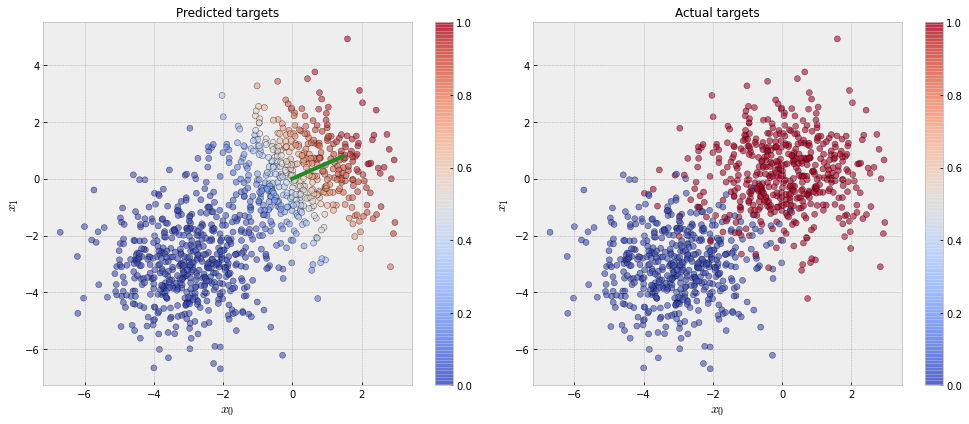

In [63]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [64]:
W = torch.Tensor([[1], [1]])

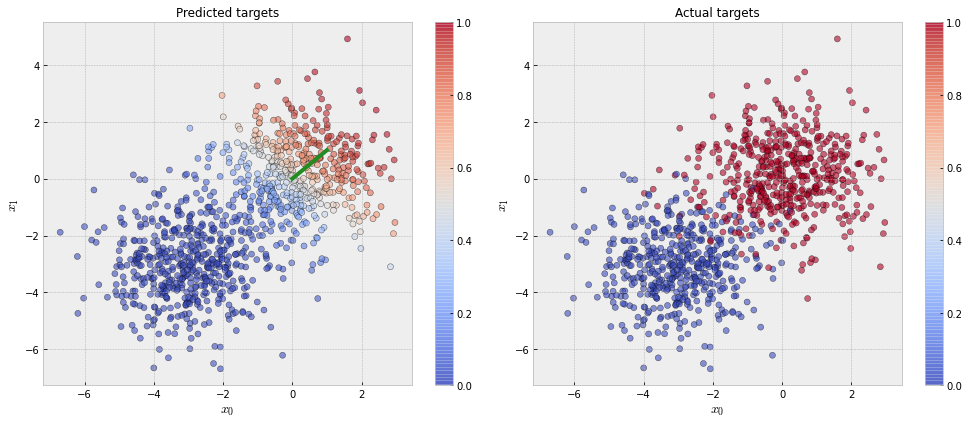

In [65]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [66]:
b = torch.Tensor([[3]])

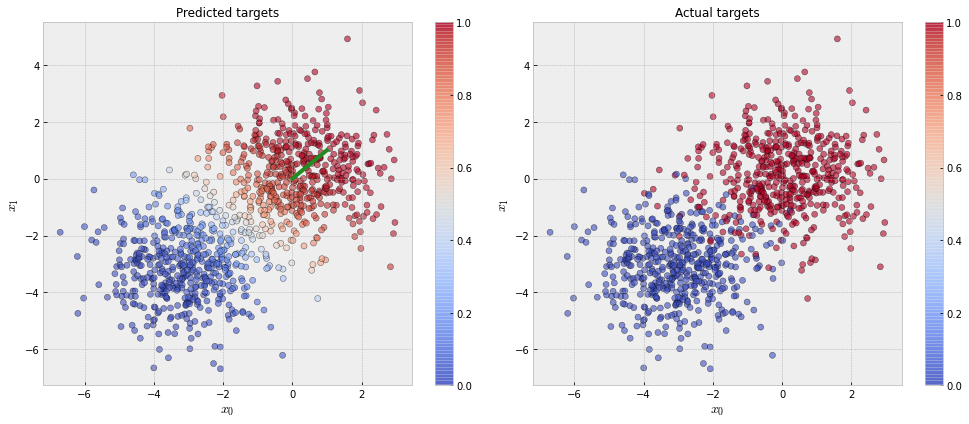

In [67]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [68]:
W = torch.Tensor([[0.5], [0.5]])
b = torch.Tensor([[1]])

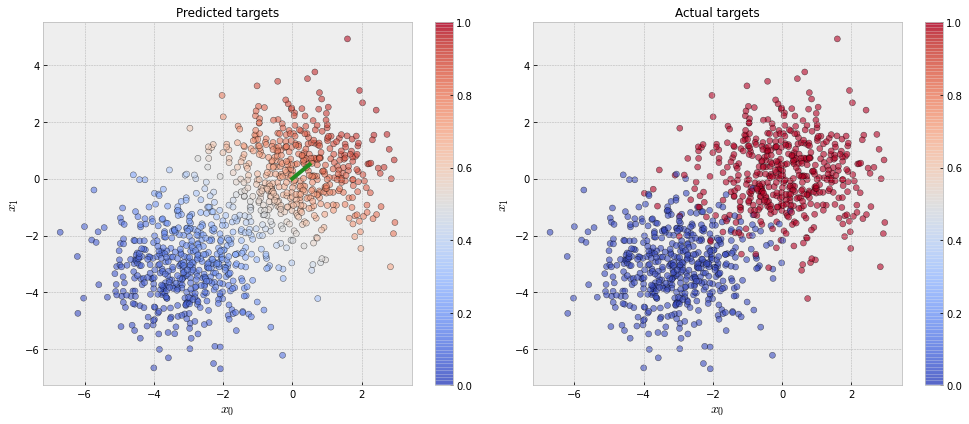

In [69]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [ ]:
W = torch.Tensor([[5], [5]])
b = torch.Tensor([[15]])

In [ ]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

## Log-loss

$$
L = - \frac{1}{N} \sum_k \left(y_k \log\left(\hat y_k\right) + \left(1 - y_k\right) \log\left(1 - \hat y_k\right)\right)
$$

$$
\hat y_i = \sigma(X_{ik}W_{k}+b)
$$

In [39]:
W = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

In [ ]:
def output(x, w, b):
    return sigmoid(torch.mm(x, w) + b)

def logloss(y, y_pred):
    return -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()

In [ ]:
y_pred = output(Xt, W, b)
loss = logloss(yt, y_pred)
loss.item(), (-loss).exp().item()

Estimate probability:

$$
L = - \frac{1}{N} \sum_k (y_k \log(\hat y_k) + (1 - y_k) \log(1 - \hat y_k)) = -\langle\log P\rangle \approx -\log \langle P\rangle
$$

Hence:

$$
\langle P\rangle \approx e^{-L}
$$


In [ ]:
EPOCHS = 1000
LR = 1e-1
DELTA = 0.00001
loss_history = []

for i in range(EPOCHS):
    y_pred = output(Xt, W, b)
    loss = logloss(yt, y_pred)
    loss.backward()
    
    loss_history.append(loss.item())

    with torch.no_grad():
        W.sub_(LR * W.grad)
        b.sub_(LR * b.grad)
    W.grad.zero_()
    b.grad.zero_()

    if i % 20 == 0:
        print(f"Epoch {i}: loss = {loss_history[-1]}")
    
    try:
        if loss_history[-2] - loss_history[-1] < DELTA:
            break
    except:
        pass

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [ ]:
W, b

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(loss_history)
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
y_ = y_pred.detach().numpy().flatten()

# Classification metrics

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_class = (y_ >= 0.5).astype(int)

In [ ]:
print(classification_report(y, y_class))

In [ ]:
plt.hist(y_[y==0], range=(0,1))
plt.hist(y_[y==1], range=(0,1))

In [ ]:
(y==0).mean()